# TVB NEST

## Custom co-simulation with TVB and NEST on CSCS infrastructure

In [4]:
!pip install pyunicore --upgrade
import pyunicore.client as unicore_client

tr = unicore_client.Transport(oauth.get_token())
r = unicore_client.Registry(tr, unicore_client._HBP_REGISTRY_URL)

# use "DAINT-CSCS" -- change if another supercomputer is prepared for usage
site_client = r.site('DAINT-CSCS')
site_client.site_url

Requirement already up-to-date: pyunicore in /opt/conda/lib/python3.6/site-packages (0.5.7)


'https://brissago.cscs.ch:8080/DAINT-CSCS/rest/core'

In [5]:
script_to_run = "launch_example.py"
job_configuration = "job_config.sh"

job_config = {
    "From": "https://raw.githubusercontent.com/the-virtual-brain/tvb-multiscale/update-collab-examples/docker/cosimulate_with_staging.sh",
    "To" : job_configuration
}

script = {
    "From": "https://raw.githubusercontent.com/the-virtual-brain/tvb-multiscale/master/docker/launch_example.py",
    "To" : script_to_run
}

my_job = {}
my_job['Executable'] = job_configuration
my_job['Arguments'] = [script_to_run]
my_job['Imports'] = [job_config, script]
my_job['Resources'] = { "CPUs": "1" }
my_job

{'Arguments': ['launch_example.py'],
 'Environment': {'UC_PREFER_INTERACTIVE_EXECUTION': 'false'},
 'Executable': 'job_config.sh',
 'Imports': [{'From': 'https://raw.githubusercontent.com/the-virtual-brain/tvb-multiscale/update-collab-examples/docker/cosimulate_with_staging.sh',
   'To': 'job_config.sh'},
  {'From': 'https://raw.githubusercontent.com/the-virtual-brain/tvb-multiscale/master/docker/launch_example.py',
   'To': 'launch_example.py'}],
 'Resources': {'CPUs': '1'}}

In [7]:
# Actual job submission
job = site_client.new_job(job_description=my_job, inputs=[])
job.properties

HTTPError: 500 Server Error: Server Error for url: https://brissago.cscs.ch:8080/DAINT-CSCS/rest/core/jobs

In [19]:
# Wait for job to complete
job.is_running()

True

In [27]:
job.properties['status']

'SUCCESSFUL'

In [21]:
wd = job.working_dir
wd.properties

{'_links': {'copy': {'description': "Copy file 'from' to file 'to'.",
   'href': 'https://brissago.cscs.ch:8080/DAINT-CSCS/rest/core/storages/0387715c-e431-45ba-9072-37e24bae086c-uspace/actions/copy'},
  'files': {'description': 'Files',
   'href': 'https://brissago.cscs.ch:8080/DAINT-CSCS/rest/core/storages/0387715c-e431-45ba-9072-37e24bae086c-uspace/files'},
  'rename': {'description': "Rename file 'from' to file 'to'.",
   'href': 'https://brissago.cscs.ch:8080/DAINT-CSCS/rest/core/storages/0387715c-e431-45ba-9072-37e24bae086c-uspace/actions/rename'},
  'self': {'href': 'https://brissago.cscs.ch:8080/DAINT-CSCS/rest/core/storages/0387715c-e431-45ba-9072-37e24bae086c-uspace'}},
 'acl': [],
 'currentTime': '2020-02-18T10:25:33+0100',
 'description': "Job's workspace",
 'metadataSupported': False,
 'mountPoint': '/scratch/snx3000/unicore/FILESPACE/0387715c-e431-45ba-9072-37e24bae086c/',
 'owner': 'CN=Valean Bogdan 308596,O=HBP',
 'protocols': ['BFT', 'SBYTEIO', 'UFTP', 'RBYTEIO'],
 're

## Result
The following cell should be run and inspected several times, until you see that the operation is done.
It will take a bit until the "output" is created, so try to run repetedly this cell, if you get errors at the begining.

In [ ]:
out = wd.stat("stdout")
f = out.raw()

all_lines = f.read().splitlines()
all_lines[-20:]

In [ ]:
err = wd.stat("stderr")
f = err.raw()
f.readlines()

In [22]:
wd.listdir()

{'.UNICORE_14e50a13-8ff3-450d-87a2-8224feb1f22d/': PathDir: .UNICORE_14e50a13-8ff3-450d-87a2-8224feb1f22d/,
 '.UNICORE_75b233de-07b5-4089-81b7-854a07c72645/': PathDir: .UNICORE_75b233de-07b5-4089-81b7-854a07c72645/,
 'UNICORE_Job_1582017970101': PathFile: UNICORE_Job_1582017970101,
 'UNICORE_SCRIPT_EXIT_CODE': PathFile: UNICORE_SCRIPT_EXIT_CODE,
 'bss_submit_1582017970101': PathFile: bss_submit_1582017970101,
 'job_config.sh': PathFile: job_config.sh,
 'launch_example.py': PathFile: launch_example.py,
 'outputs/': PathDir: outputs/,
 'stderr': PathFile: stderr,
 'stdout': PathFile: stdout}

Now we are downloading the results and plot them

In [23]:
wd.stat("outputs/res/results.npy").download("results.npy")
wd.stat("outputs/res/connectivity_weights.npy").download("connectivity_weights.npy")
wd.stat("outputs/res/connectivity_lengths.npy").download("connectivity_lengths.npy")

import numpy
result_ts = numpy.load("results.npy")
connectivity_weights = numpy.load("connectivity_weights.npy")
connectivity_lengths = numpy.load("connectivity_lengths.npy")

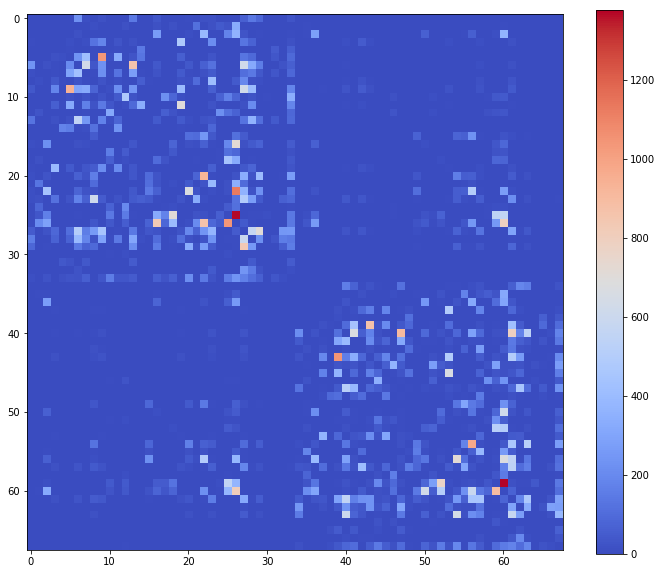

In [28]:
%matplotlib inline
from tvb.simulator.lab import *
from tvb.simulator.plot import tools

tools.plot_matrix(connectivity_weights)

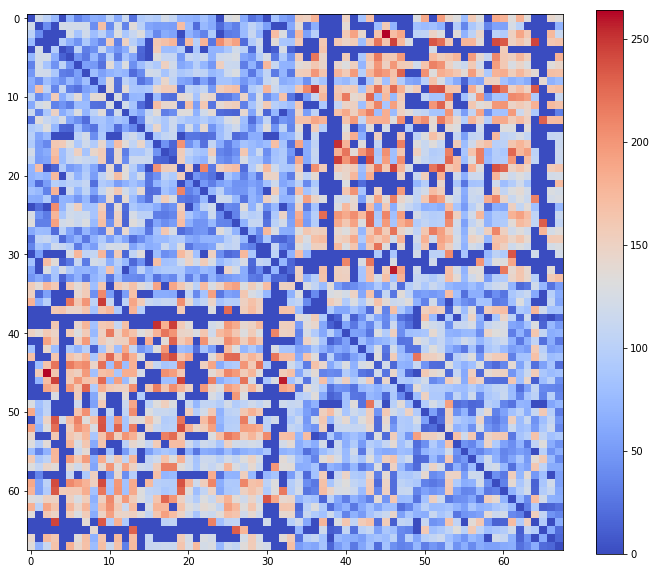

In [25]:
tools.plot_matrix(connectivity_lengths)

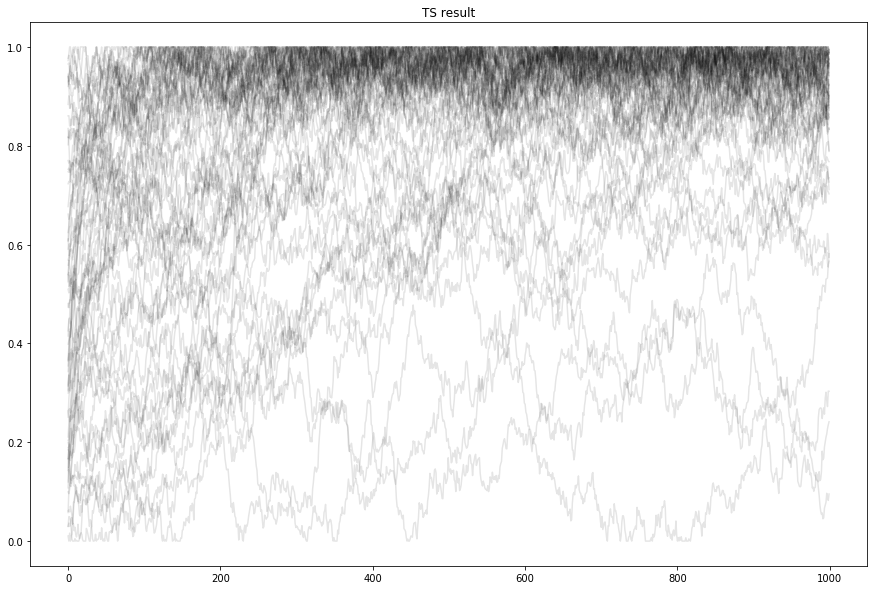

In [26]:
from matplotlib.pyplot import *
figure(figsize=(15, 10))
plot(numpy.arange(1000), result_ts[:, 0, :, 0], 'k', alpha=0.1)
title("TS result")